### The Evolution of Lewis Hamilton: A data driven career overview

In [5]:
#import libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import fastf1
from pathlib import Path
import numpy as np

In [2]:
#set up a cache
fastf1.Cache.enable_cache('cache') 

In [ ]:
#getting names of circuits
years = list(range(2018,2025))

circuits = set()

for year in years:
    try:
        schedule = fastf1.get_event_schedule(year)
        event_names = schedule['EventName'].tolist()
        circuits.update(event_names)
    except Exception as e:
        print(f"Error fetching data from {year}: {e}")

print("Circuits from 2018-2024:")
for event in sorted(circuits):
    print(f"{event}")

In [ ]:
#extracting race data
from fastf1.core import Session

years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]

for year in years:
    try:
        schedule = fastf1.get_event_schedule(year)
        gp_names = schedule['EventName'].tolist()
    except Exception as e:
        print(f"Could not load schedule for year {year}: {e}")
        continue

    for gp in gp_names:
        if gp not in gp_names:
            print(f"Skipping {year} {gp} (not in schedule)")
            continue

        try:
            session = fastf1.get_session(year, gp, 'R')
            session.load()
            laps = session.laps.pick_drivers('HAM')
            gp = gp.replace(' ','_')
            filename = f"data/{year}_{gp}_laps.csv"
            laps.to_csv(filename)
            print(f"Saved data for {year} {gp}")
        except Exception as e:
            print(f"Skipping {year} {gp} due to error: {e}")

In [ ]:
#getting the calender for a particular year
events = fastf1.get_event_schedule(2021)
print(events[['EventName', 'EventFormat']])

In [ ]:
#getting just one session
from fastf1.core import Session
year = 2022
gp = 'Mexico City Grand Prix'
try:
        session = fastf1.get_session(year, gp, 'R')
        session.load()
        laps = session.laps.pick_drivers('HAM')
        gp = gp.replace(' ','_')
        filename = f"data/{year}_{gp}_laps.csv"
        laps.to_csv(filename)
        print(f"Saved data for {year} {gp}")
except Exception as e:
    print(f"Skipping {year} {gp} due to error: {e}")

In [3]:
df = pd.read_csv('data/2018_Abu_Dhabi_Grand_Prix_laps.csv')
print(df)

    Unnamed: 0                    Time Driver  DriverNumber  \
0          637  0 days 00:35:49.270000    HAM            44   
1          638  0 days 00:38:37.621000    HAM            44   
2          639  0 days 00:41:13.586000    HAM            44   
3          640  0 days 00:43:57.834000    HAM            44   
4          641  0 days 00:45:41.816000    HAM            44   
5          642  0 days 00:47:26.502000    HAM            44   
6          643  0 days 00:49:34.886000    HAM            44   
7          644  0 days 00:52:02.348000    HAM            44   
8          645  0 days 00:53:47.243000    HAM            44   
9          646  0 days 00:55:32.387000    HAM            44   
10         647  0 days 00:57:17.311000    HAM            44   
11         648  0 days 00:59:02.503000    HAM            44   
12         649  0 days 01:00:47.524000    HAM            44   
13         650  0 days 01:02:32.291000    HAM            44   
14         651  0 days 01:04:17.654000    HAM          

## Mercedes dominant years vs later years

Position NaN in last lap for file 2018_Austrian_Grand_Prix_laps.csv
Position NaN in last lap for file 2018_Bahrain_Grand_Prix_laps.csv
Position NaN in last lap for file 2020_Austrian_Grand_Prix_laps.csv
Position NaN in last lap for file 2020_Pre-Season_Test_1_laps.csv
Position NaN in last lap for file 2020_Pre-Season_Test_2_laps.csv
No valid laps in file 2020_Sakhir_Grand_Prix_laps.csv
Position NaN in last lap for file 2022_Belgian_Grand_Prix_laps.csv
Position NaN in last lap for file 2023_Qatar_Grand_Prix_laps.csv
Position NaN in last lap for file 2024_Australian_Grand_Prix_laps.csv
Position NaN in last lap for file 2024_United_States_Grand_Prix_laps.csv


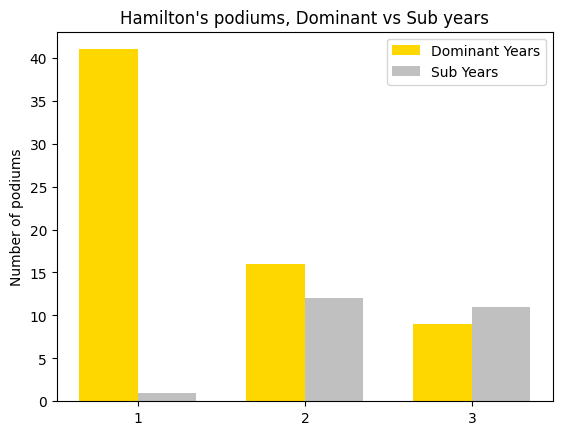

In [13]:
#dominant years
years = [2018, 2019, 2020, 2021]
data_path = Path("data")

count_1_high = 0
count_2_high = 0
count_3_high = 0

for year in years:
    for file in data_path.glob(f"{year}_*_laps.csv"):
        df = pd.read_csv(file)

        last_lap_val = df['LapNumber'].max()
        if pd.notna(last_lap_val):
            last_lap = int(last_lap_val)
            last_lap_data = df[df['LapNumber'] == last_lap]
            
            if not last_lap_data.empty and pd.notna(last_lap_data['Position'].iloc[0]):
                pos = int(last_lap_data['Position'].iloc[0])
                if pos == 1:
                    count_1_high += 1
                elif pos == 2:
                    count_2_high += 1
                elif pos == 3:
                    count_3_high += 1
            else:
                print(f"Position NaN in last lap for file {file.name}")
        else:
            print(f"No valid laps in file {file.name}")


#not so dominant years
years = [2022, 2023, 2024]
data_path = Path("data")

count_1_low = 0
count_2_low = 0
count_3_low = 0

for year in years:
    for file in data_path.glob(f"{year}_*_laps.csv"):
        df = pd.read_csv(file)

for year in years:
    for file in data_path.glob(f"{year}_*_laps.csv"):
        df = pd.read_csv(file)

        last_lap_val = df['LapNumber'].max()
        if pd.notna(last_lap_val):
            last_lap = int(last_lap_val)
            last_lap_data = df[df['LapNumber'] == last_lap]
            
            if not last_lap_data.empty and pd.notna(last_lap_data['Position'].iloc[0]):
                pos = int(last_lap_data['Position'].iloc[0])
                if pos == 1:
                    count_1_low += 1
                elif pos == 2:
                    count_2_low += 1
                elif pos == 3:
                    count_3_low += 1
            else:
                print(f"Position NaN in last lap for file {file.name}")
        else:
            print(f"No valid laps in file {file.name}")

podium = [1,2,3]
dominant_counts = [count_1_high, count_2_high, count_3_high]
sub_counts = [count_1_low, count_2_low, count_3_low]

x = np.arange(len(podium))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, dominant_counts, width, label = 'Dominant Years', color = 'gold')
ax.bar(x + width/2, sub_counts, width, label = 'Sub Years', color = 'silver')

ax.set_xticks(x)
ax.set_xticklabels(podium)
ax.set_ylabel('Number of podiums')
ax.set_title("Hamilton's podiums, Dominant vs Sub years")
ax.legend()
plt.show()

##Fastest lap time comparisons

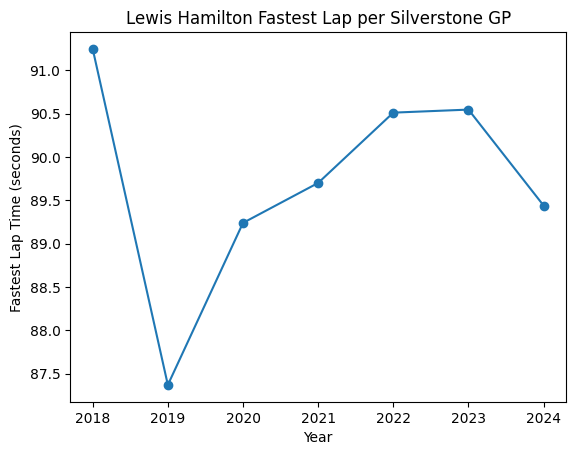

In [22]:
fastest_laps = []
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024]
for year in years:
    for file in data_path.glob(f"{year}_British_Grand_Prix_laps.csv"):
            df = pd.read_csv(file)
            df['LapTime'] = pd.to_timedelta(df['LapTime'])
            fastest_lap = df['LapTime'].min()
            fastest_laps.append((year, fastest_lap))

# Only take the years and lap times we actually have
lap_years = [year for year, td in fastest_laps]
lap_times = [td.total_seconds() for year, td in fastest_laps]  # convert to seconds

plt.plot(lap_years, lap_times, marker='o')
plt.xlabel("Year")
plt.ylabel("Fastest Lap Time (seconds)")
plt.title("Lewis Hamilton Fastest Lap per Silverstone GP")
plt.show()
